<a href="https://colab.research.google.com/github/Reyhan-Code/modelJamur2025/blob/main/Salinan_dari_PendeteksiJamur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import zipfile
import gdown
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
# from google.colab import drive
from PIL import Image

In [2]:
# Ganti dengan ID file Anda
file_id = '1612QhGakZUQjDPMz-HnGXTVmPr7Klu_d'
url = f'https://drive.google.com/uc?id={file_id}'

# Lokasi tempat menyimpan file zip yang diunduh
zip_path = '/content/dataset_jamur2.zip'

# Mengunduh file
gdown.download(url, zip_path, quiet=False)

# Ekstrak file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/my_folder')

Downloading...
From (original): https://drive.google.com/uc?id=1612QhGakZUQjDPMz-HnGXTVmPr7Klu_d
From (redirected): https://drive.google.com/uc?id=1612QhGakZUQjDPMz-HnGXTVmPr7Klu_d&confirm=t&uuid=03d269e4-7997-4b8c-9db7-6d501b93204c
To: /content/dataset_jamur2.zip
100%|██████████| 290M/290M [00:11<00:00, 26.2MB/s]


In [5]:
# Update base_dir
base_dir = '/content/my_folder/jamur_dataset2/jamur_dataset' # Adjust to the new extraction path
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
def load_images_from_directory(directory, width, height):
    image_data = []
    image_target = []
    classes = os.listdir(directory)
    for title in classes:
        class_dir = os.path.join(directory, title)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert("RGB")
                        img = img.resize((width, height))
                        img_array = np.array(img)
                        image_data.append(img_array)
                        image_target.append(title)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(image_data), np.array(image_target)

In [7]:
train_images, train_labels = load_images_from_directory(train_dir, 224, 224)
validation_images, validation_labels = load_images_from_directory(validation_dir, 224, 224)

train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
validation_labels = lb.transform(validation_labels)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(len(lb.classes_), activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=32,
    validation_data=(validation_images, validation_labels)
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - accuracy: 0.1333 - loss: 2.8415 - val_accuracy: 0.3525 - val_loss: 1.9265
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3075 - loss: 2.0929 - val_accuracy: 0.5825 - val_loss: 1.4893
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4749 - loss: 1.5738 - val_accuracy: 0.6625 - val_loss: 1.2439
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5648 - loss: 1.2983 - val_accuracy: 0.6950 - val_loss: 1.0892
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6415 - loss: 1.1440 - val_accuracy: 0.7150 - val_loss: 0.9890
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6645 - loss: 1.0095 - val_accuracy: 0.7325 - val_loss: 0.9200
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7257 - loss: 0.8914 - val_accuracy: 0.7400 - val_loss: 0.8755
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7321 - loss: 0.8398 - val_accuracy: 0.7475 -

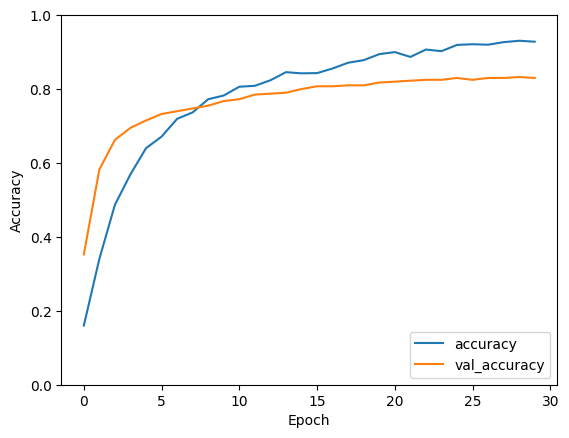

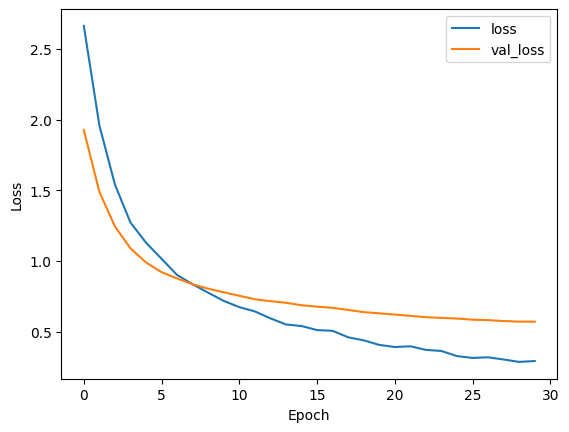

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [12]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))

['Jamur Barat', 'Coprinopsis lagopus', 'jamur kuping', 'Leucoagaricus leucothites', 'Jamur Merang', 'Amanita phalloides', 'jamur Lentinus Squarrosulus', 'Mycena leaiana', 'Jamur Tiram', 'Chlorophyllum molybdites']
['Jamur Barat', 'Coprinopsis lagopus', 'jamur kuping', 'Leucoagaricus leucothites', 'Jamur Merang', 'Amanita phalloides', 'jamur Lentinus Squarrosulus', 'Mycena leaiana', 'Jamur Tiram', 'Chlorophyllum molybdites']


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_images, validation_labels)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Predict classes
y_pred = np.argmax(model.predict(validation_images), axis=1)
y_true = np.argmax(validation_labels, axis=1)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_true, y_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))
print('Classification Report:')
print(classification_report(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8026 - loss: 0.6320
Loss: 0.5697
Accuracy: 83.00%
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step
Validation Accuracy: 83.00%
Confusion Matrix:
[[36  1  0  0  0  0  3  0  0  0]
 [ 0 34  2  0  1  0  2  0  1  0]
 [ 0  3 36  0  0  0  0  0  0  1]
 [ 3  2  3 29  3  0  0  0  0  0]
 [ 6  0  5  1 14  9  1  0  4  0]
 [ 0  0  0  0  2 36  0  0  1  1]
 [ 0  2  0  1  1  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  2  1  0  1  0  0 36  0]
 [ 0  0  0  0  0  1  0  2  0 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.81      0.85      0.83        40
           2       0.75      0.90      0.82        40
           3       0.91      0.72      0.81        40
           4       0.67      0.35      0.46        40
           5       0.75      0.90      0.82        40
           6       0.85      0.88      0.86        40
           7       0.9

In [14]:
model.save('model.h5')

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelJamur2025.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TFLite and saved as 'model.tflite'")

Saved artifact at '/tmp/tmpq5xa9qxn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139959931546000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931545616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931547920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931547536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931546384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931548112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931547152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931535632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931548304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931546192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139959931

In [16]:
img_path = '/content/474618939_1574171453235263_7077573543714173650_n.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Define class labels
labels = [
    'Amanita phalloides',
    'Chlorophyllum molybdites',
    'Coprinopsis lagopus',
    'Jamur Barat',
    'Jamur Merang',
    'Jamur Tiram',
    'Leucoagaricus leucothites',
    'Mycena leaiana',
    'jamur Lentinus Squarrosulus',
    'jamur kuping'
]

# Make a prediction
prediction = model.predict(img_array)
index = np.argmax(prediction)
class_names = labels[index]

# Print prediction results
accuracy = np.max(prediction) * 100
predicted_class = class_names
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Save the model
model.save("model.h5")

# # Evaluate the model on the validation set
# val_predictions = model.predict(validation_images)
# val_predictions_classes = np.argmax(val_predictions, axis=1)
# val_true_classes = np.argmax(validation_labels, axis=1)

# # Print evaluation metrics
# print("Accuracy: ", accuracy_score(val_true_classes, val_predictions_classes))
# print("Classification Report:\n", classification_report(val_true_classes, val_predictions_classes, target_names=labels))
# print("Confusion Matrix:\n", confusion_matrix(val_true_classes, val_predictions_classes))

# # Visualize the confusion matrix
# conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Predicted Class: Jamur Barat
Prediction Accuracy: 73.20%
